In [58]:
# Importamos las librerias que necesitamos 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

In [86]:
# Leemos el dataset 
autos = pd.read_csv('ML_cars.csv')
# Guardamos en variables los datos categoricos y numericos
datos_numericos = autos.select_dtypes(include=[np.number])
categorias = autos.select_dtypes(include=['object'])
# Eliminamos las variables que tienen menos correlacion con respecto al precio
var_menos_corr= ['symboling','stroke','compressionratio','peakrpm']
datos_numericos.drop(var_menos_corr, axis=1, inplace= True)
# Convertimos a Dummies todos los datos
dummies= categorias.drop('CarName', axis= 1)
dummies = pd.concat([dummies,datos_numericos['price']], axis=1)
dummies = pd.get_dummies(dummies)
dummies.head(5)

,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,13495.0,False,True,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,16500.0,False,True,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,16500.0,False,True,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,13950.0,False,True,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,17450.0,False,True,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [70]:
# Eliminamos la variable car_ID ya que esta solo es un identificador unico para cada auto
datos_numericos.drop('car_ID', axis= 1, inplace= True)
# Escalamos los datos
ss= StandardScaler()
dat_numer_esc= ss.fit_transform(datos_numericos)
dat_numer_esc= pd.DataFrame(dat_numer_esc, columns= datos_numericos.columns)
dat_numer_esc


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,0.027391
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,0.404461
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,1.264536,-0.953012,-0.691627,0.404461
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,0.084485
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.275883,-1.106241,-1.273900,0.523668
...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,0.250533,-0.340094,-0.400490,0.447752
201,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,1.416637,-0.953012,-0.837195,0.723810
202,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,0.757535,-1.106241,-1.128332,1.029983
203,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,0.047732,0.119594,-0.546059,1.153582


In [87]:
# Eliminamos la columna del precio en los datos que ya transformamos a dummies
dummies.drop('price', axis=1, inplace=True)
# Concatenamos los datos escalados categoricos y numericos
datos_escalados = pd.concat([dummies,dat_numer_esc], axis=1)
datos_escalados.head(5)

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,False,True,True,False,False,True,True,False,False,False,...,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,0.027391
1,False,True,True,False,False,True,True,False,False,False,...,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,0.404461
2,False,True,True,False,False,True,False,False,True,False,...,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,1.264536,-0.953012,-0.691627,0.404461
3,False,True,True,False,True,False,False,False,False,True,...,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,0.084485
4,False,True,True,False,True,False,False,False,False,True,...,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.275883,-1.106241,-1.273900,0.523668


In [76]:
# Dividimos los datos para entrenar el modelo y testearlo despues
y_scl = datos_escalados['price']
x_scl = datos_escalados.drop('price', axis=1)
x_trn_scl, x_test_scl, y_trn_scl, y_test_scl = train_test_split(x_scl, y_scl, test_size= 0.20, random_state= 18)

print(x_trn_scl.shape)
print(x_test_scl.shape)
print(y_trn_scl.shape)
print(y_test_scl.shape)

(164, 48)
(41, 48)
(164,)
(41,)


In [77]:
# Entrenamos el modelo de RandomForest
randomf = RandomForestRegressor()
randomf.fit(x_trn_scl,y_trn_scl)

RandomForestRegressor()

In [78]:
# Testeamos el modelo que acabamos de entrenar
rf_prediccion= randomf.predict(x_test_scl)

In [79]:
# Calculamos el mae y R2 para ver que tan eficiente fue nuestro modelo
mae = round(mean_absolute_error(y_test_scl, rf_prediccion),3)
r2 = round(r2_score(y_test_scl, rf_prediccion),3) 

print(f"MAE: {mae}")
print(f"R²: {r2}")

MAE: 0.21
R²: 0.938


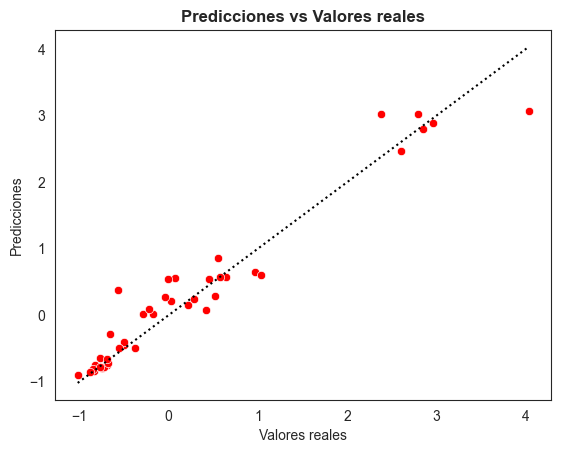

In [88]:
# Generamos un grafico para ver graficamente que tan cercanas estuvieron las predicciones a la realidad
sns.set_style("white")
sns.scatterplot(x = y_test_scl, y = rf_prediccion, color='r')
plt.plot([y_test_scl.min(), y_test_scl.max()], [y_test_scl.min(), y_test_scl.max()], 'k:', lw=1.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales", fontweight="bold")
plt.grid(False)
plt.show()